In [ ]:
#jalanin di terminal
!pip install cvzone
!pip install opencv-python
!pip install ultralytics

In [ ]:
# kalo ga bisa jalanin di terminal
#STEP 2
from ultralytics import YOLO
from IPython.display import Image
import cv2
import cvzone
import math


   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.1 MB ? eta -:--:--
   ------------------- -------------------- 0.5/1.1 MB 1.7 MB/s eta 0:00:01
   ------------------- -------------------- 0.5/1.1 MB 1.7 MB/s eta 0:00:01
   ----------------------------- ---------- 0.8/1.1 MB 985.5 kB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 1.2 MB/s  0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 985.5 kB/s eta 0:00:08
   ---- ----------------------------------- 0.8/7.8 MB 1.2 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/7.8 MB 1.2 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/7.8 MB 1.2 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/7.8 MB 1.2 MB/s eta 0:00:06
   -------- ---------------------------

ModuleNotFoundError: No module named 'cvzone'

In [16]:
from ultralytics import YOLO

model = YOLO(r"..\content\datacontent\yolo_models\best.pt")

In [19]:
#STEP 4
input_image = cv2.imread(r"../content/datacontent/test/images/acne-209_jpg.rf.a1dde106a5e5c3cd2b93666e9e226930.jpg")
results = model.predict(source=input_image, conf=0.25,  imgsz=992 )
# Print the masks instead of bounding boxes
if results[0].masks is not None:
    print(results[0].masks.xy)
else:
    print("No masks found in the results.")

#STEP 5
results[0].boxes.conf
results[0].boxes.cls
classNames = ["Acne"]


0: 992x992 31 Acnes, 149.2ms
Speed: 30.6ms preprocess, 149.2ms inference, 7.3ms postprocess per image at shape (1, 3, 992, 992)
No masks found in the results.



0: 640x640 25 Acnes, 72.4ms
Speed: 7.2ms preprocess, 72.4ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


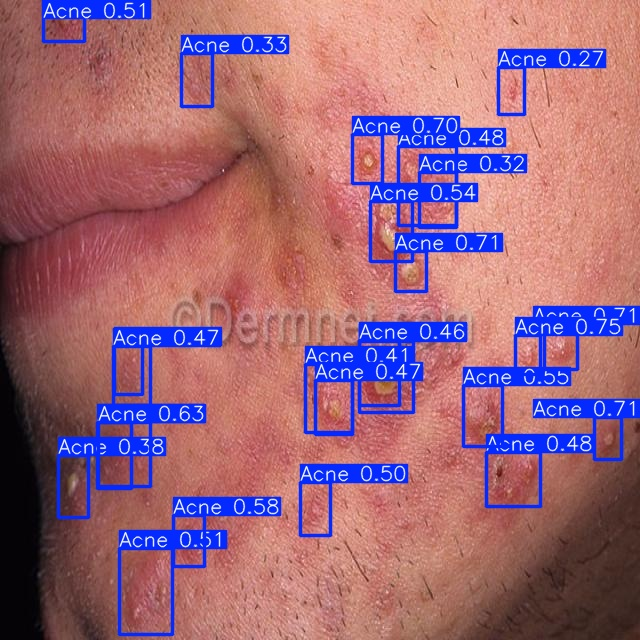

Detected 25 acne spots → Severity: Severe


In [21]:
#STEP 6 terakhir kalo cuma mau liat hasil bukan apinya
#box ijo
# results = model(input_image, stream=True)
# for r in results:
#     boxes = r.boxes
#     for box in boxes:
#         x1, y1, x2, y2 = box.xyxy[0]
#         x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
#         w, h = x2-x1, y2-y1
#         cvzone.cornerRect(input_image, (x1, y1, w, h))

#         conf = math.ceil((box.conf[0]*100))/100

#         cls = box.cls[0]
#         name = classNames[int(cls)]

#         cvzone.putTextRect(input_image, f'{name} 'f'{conf}', (max(0,x1), max(35,y1)), scale = 0.5)

# cv2.imwrite('output.jpg', input_image)

# box biru high res
results = model.predict(source=input_image, conf=0.25, imgsz=640)
results = list(results)
cv2.imwrite(r"../content/datacontent/result/output.jpg", results[0].plot())
display(Image(filename=r"../content/datacontent/result/output.jpg"))
num_acne = len(results[0].boxes)
if num_acne == 0:
    severity = "No acne detected"
elif num_acne <= 5:
    severity = "Low"
elif num_acne <= 20:
    severity = "Medium"
else:
    severity = "Severe"

print(f"Detected {num_acne} acne spots → Severity: {severity}")
